# 911 Calls Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

In [2]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
df = pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic EDA

 The top 5 zipcodes for 911 calls

In [13]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

The top 5 townships (twp) for 911 calls

In [14]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

How many unique title codes is present

In [15]:
df['title'].nunique()

110

## Creating new features

- In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.
- For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [16]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

The most common Reason for a 911 call based off of this new column

In [17]:
df['Reason'].value_counts().head(5)

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

A countplot of 911 calls by Reason.

<Axes: xlabel='Reason', ylabel='count'>

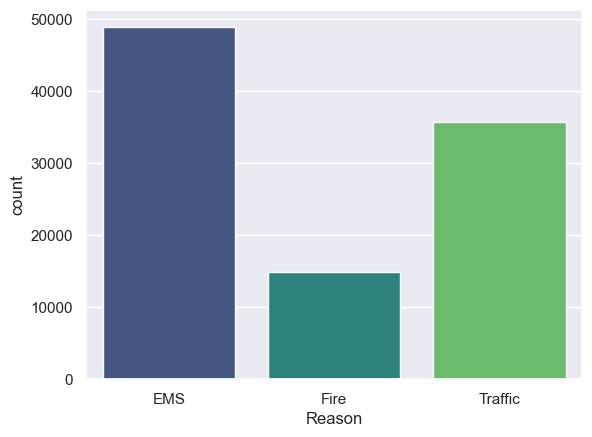

In [19]:
sns.countplot(data=df, x='Reason', palette='viridis')

In [21]:
type(df['timeStamp'].iloc[0])

str

Converting the column from strings to DateTime objects

In [22]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [23]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Notice how the Day of Week is an integer 0-6. Mapping the actual string names to the day of the week:

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [29]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [30]:
df['Dayofweek'] = df['Dayofweek'].map(dmap)

Creating a countplot of the Day of Week column with the hue based off of the Reason column.

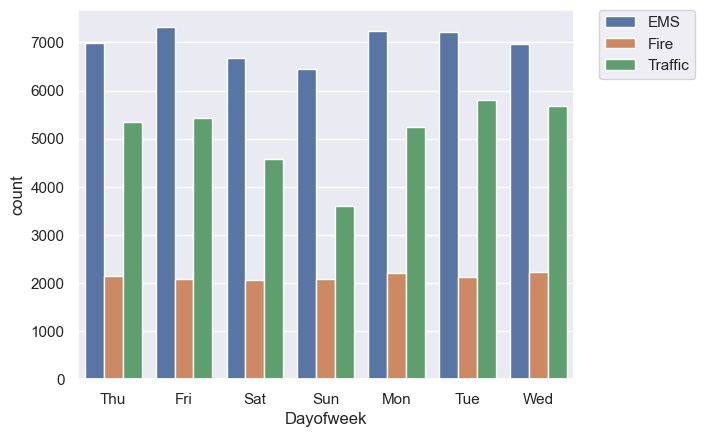

In [31]:
sns.countplot(data=df, x='Dayofweek', hue='Reason')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

The same for Month

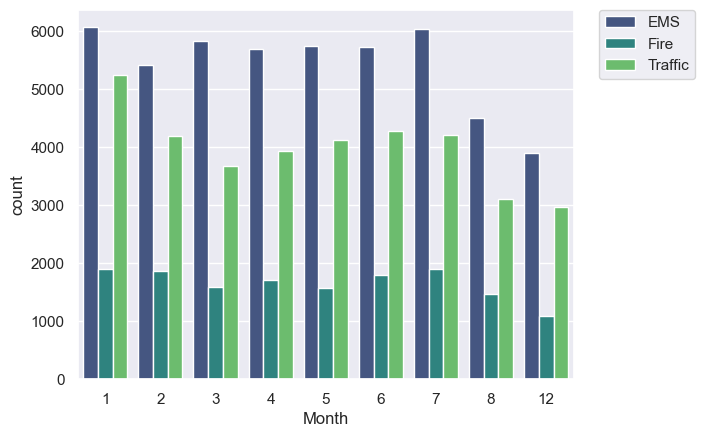

In [36]:
sns.countplot(data=df, x='Month', hue='Reason', palette='viridis')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

**Did you notice something strange about the Plot?**

_____


In [39]:
bymonth = df.groupby('Month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Dayofweek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Create a simple plot off of the dataframe indicating the count of calls per month.

In [43]:
bymonth['twp'].plot


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


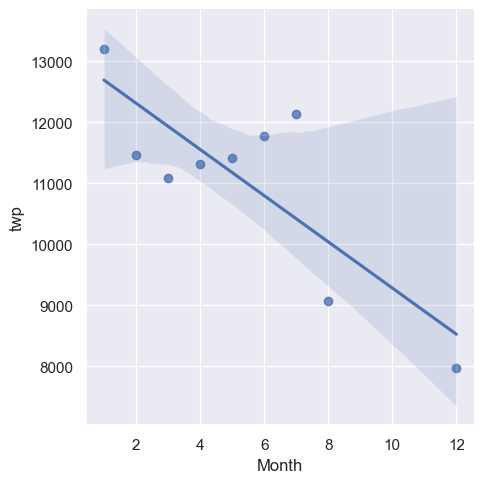

In [44]:
sns.lmplot(data=bymonth.reset_index(), x='Month', y='twp')

Creating a new column called 'Date' that contains the date from the timeStamp column.

In [45]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

Groupby this Date column with the count() aggregate

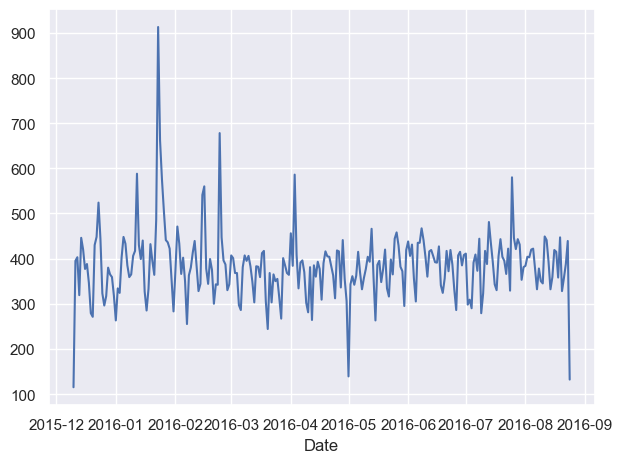

In [47]:
df.groupby('Date').count()['twp'].plot()

plt.tight_layout()

Creating 3 separate plots with each plot representing a Reason for the 911 call

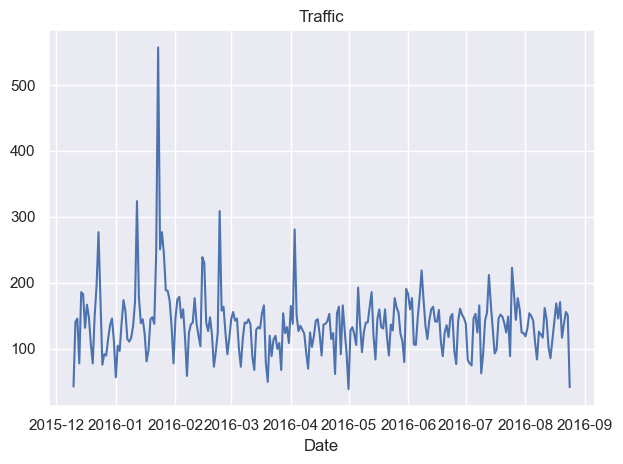

In [50]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

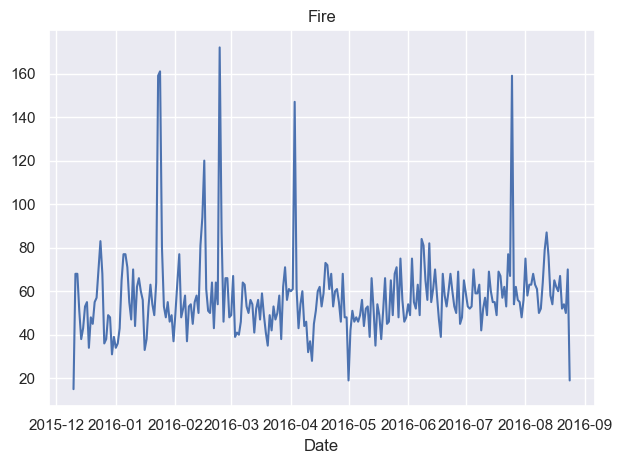

In [51]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

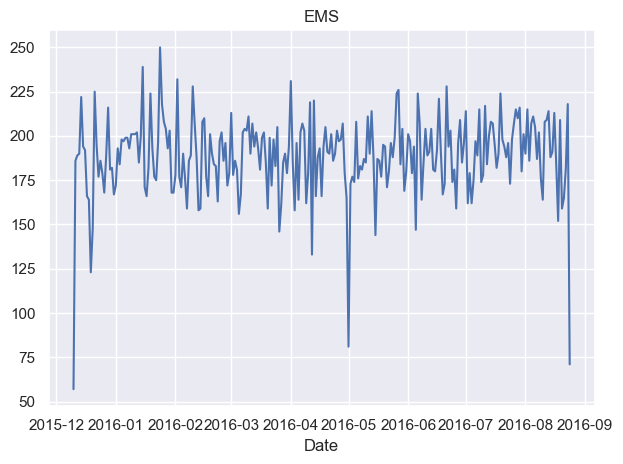

In [52]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [54]:
dayhour = df.groupby(by=['Dayofweek','hour']).count()['Reason'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Creating a HeatMap using this new DataFrame.

<Axes: xlabel='hour', ylabel='Dayofweek'>

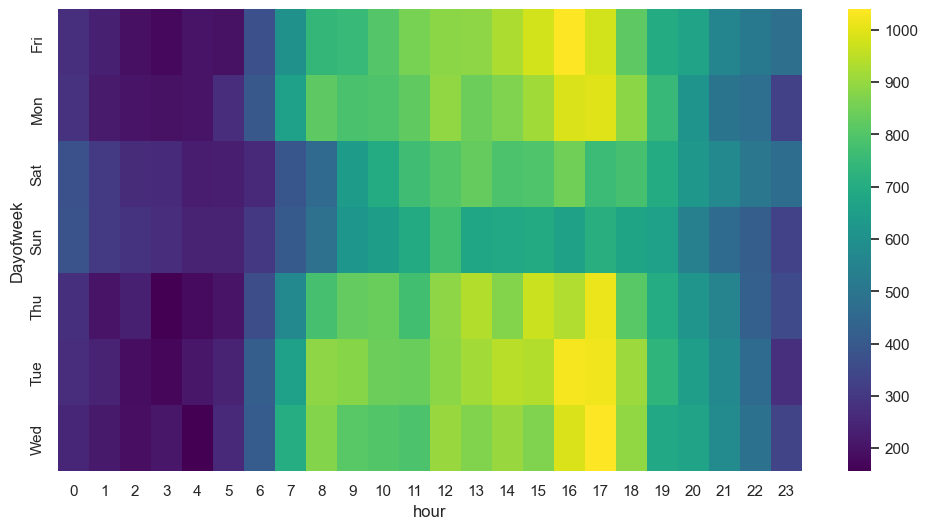

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayhour, cmap='viridis')

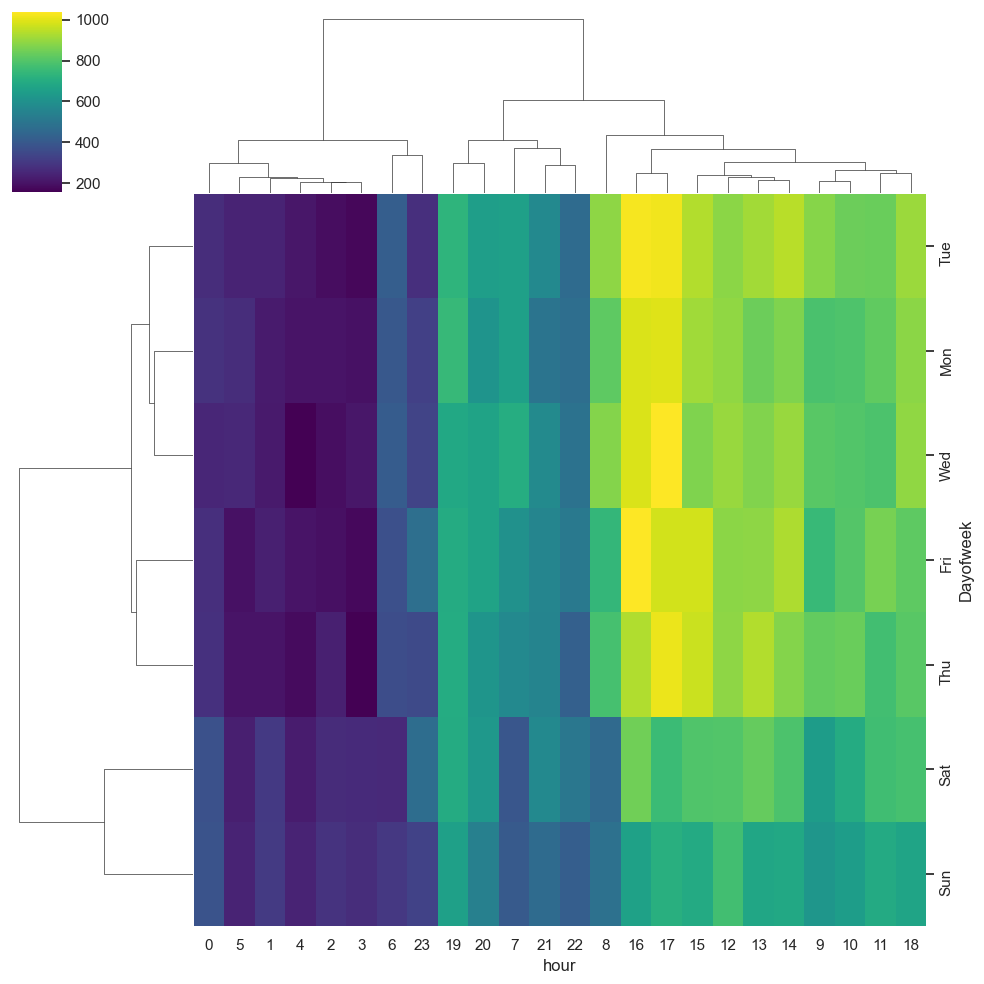

In [56]:
sns.clustermap(data=dayhour, cmap='viridis')

Heatmap that shows the Month as the column.

In [59]:
daymonth = df.groupby(by=['Dayofweek','Month']).count()['Reason'].unstack()
daymonth.head()

Month,1,2,3,4,5,6,7,8,12
Dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Dayofweek'>

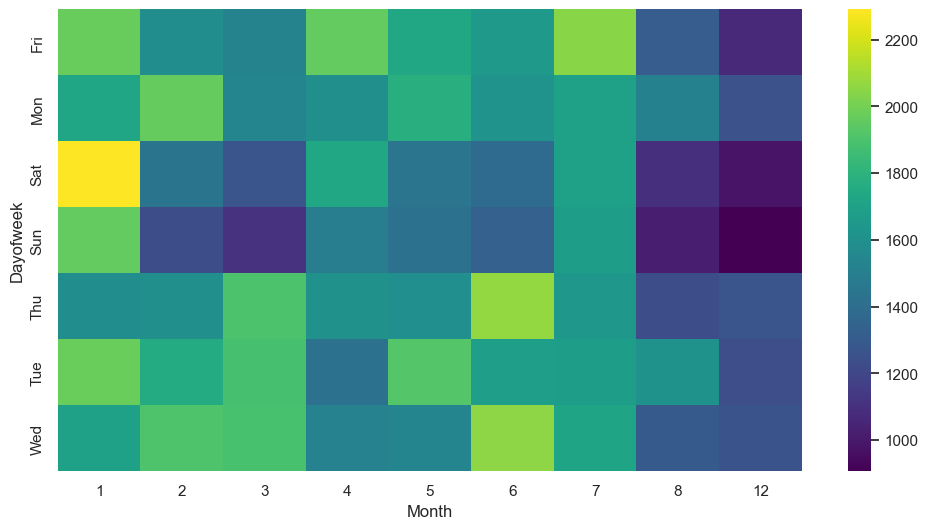

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(data=daymonth, cmap='viridis')

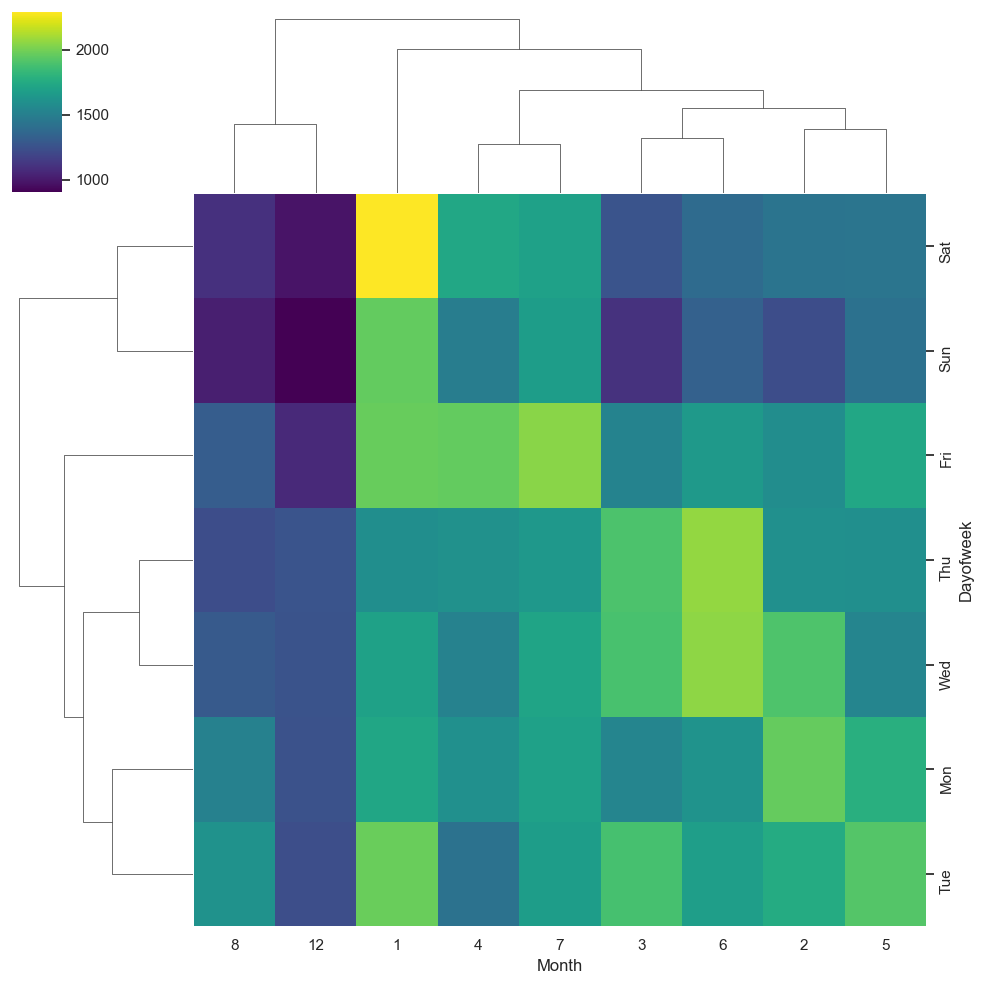

In [67]:
sns.clustermap(data=daymonth, cmap='viridis')